In [61]:
import pandas as pd
import datetime
import numpy as np
import warnings

warnings.filterwarnings('ignore')
path = "D:/program/program1/User_portrait/"

In [20]:
# data = pd.read_csv(path + "20190228_1.csv", names = ['dot', 'order_date', 'order_num', 'num', 'total_freight'])

In [261]:
# data.head()

In [260]:
# len(data)

In [23]:
# data.dropna(axis = 0, inplace = True)

In [32]:
# data_1 = data[data['total_freight'] > 1]

In [259]:
# len(data_1)

In [258]:
# data_1.describe()

In [257]:
# data_1[data_1['total_freight'] == 1.01].head()

In [229]:
data_company = pd.read_csv(path + "20190301.csv", names = ['order_date', 'company', 'total_freight'])

In [230]:
data_company['order_date'] = pd.to_datetime(data_company['order_date'], format = '%Y-%m-%d')

In [231]:
data_company['data_diff'] = pd.to_datetime('today') - data_company['order_date']

In [232]:
data_company['data_diff'] = data_company['data_diff'].dt.days

In [233]:
R_data = data_company.groupby(by = 'company')['data_diff'].agg({'recency' : np.min})

In [234]:
R_data.sort_values(by = 'recency').head()

,recency
company,
温州平乐,21
上海斯尔丽(奉贤),21
温州金丝兔,21
杭州森马,21
嘉善四仓,21


In [235]:
F_data = data_company.groupby(by = 'company')['order_date'].agg({'frequency':np.size})

In [236]:
F_data.sort_values(by = 'frequency', ascending = False).head()

,frequency
company,
义乌维绑,161
义乌飘缕,161
深圳泛森柏尔,161
无锡小洋兔,161
义乌锦星,161


In [237]:
M_data = data_company.groupby(by = 'company')['total_freight'].agg({'monetary':np.sum})

In [238]:
M_data.sort_values(by = 'monetary', ascending = False).head()

,monetary
company,
深圳云创文化,23483204.80
嘉善云仓,14796647.02
顺德云仓,13313936.26
成都云仓,9853304.59
浙江森马,9142612.68


In [239]:
rfm_data = pd.concat([R_data, F_data, M_data], axis = 1)

In [240]:
rfm_data.isnull().sum()

recency      0
frequency    0
monetary     0
dtype: int64

In [241]:
rfm_data.head()

,recency,frequency,monetary
company,,,
01个人刘健,61,2,669.00
3M苏州,78,8,4452.50
66号定制家居,39,6,12928.60
Dotwil点为商城,30,4,635.79
IT中心测试,38,3,217.00


In [242]:
def create_label(data, n, mark):
    bins = data.quantile(q = np.linspace(0,1,n), interpolation = 'nearest')
    bins[0] = 0
    if mark == 1:
        labels = [5, 4, 3, 2, 1]
    elif mark == 2:
        labels = [1, 2, 3, 4, 5]
    else:
        labels = [1, 2, 3, 4, 5, 6, 7, 8]
    label = pd.cut(data, bins = bins, labels = labels)
    return label

In [243]:
R_label = create_label(rfm_data['recency'], 6, 1)
F_label = create_label(rfm_data['frequency'], 6, 2)
M_label = create_label(rfm_data['monetary'], 6, 2)

In [244]:
rfm_data['R_label'] = R_label
rfm_data['F_label'] = F_label
rfm_data['M_label'] = M_label

In [248]:
M_label.isnull().sum()

1

In [245]:
rfm_data.head()

,recency,frequency,monetary,R_label,F_label,M_label
company,,,,,,
01个人刘健,61,2,669.00,3,2,2
3M苏州,78,8,4452.50,2,4,4
66号定制家居,39,6,12928.60,4,4,5
Dotwil点为商城,30,4,635.79,5,3,2
IT中心测试,38,3,217.00,4,3,1


In [249]:
rfm_data.dropna(axis = 0, inplace = True)

In [250]:
rfm_data['rfm'] = 100 * rfm_data['R_label'].astype(int) + 10 * rfm_data['F_label'].astype(int) + 1 * rfm_data['M_label'].astype(int)

In [251]:
rfm_data.head()

,recency,frequency,monetary,R_label,F_label,M_label,rfm
company,,,,,,,
01个人刘健,61,2,669.00,3,2,2,322
3M苏州,78,8,4452.50,2,4,4,244
66号定制家居,39,6,12928.60,4,4,5,445
Dotwil点为商城,30,4,635.79,5,3,2,532
IT中心测试,38,3,217.00,4,3,1,431


In [252]:
rfm_data['level'] = create_label(rfm_data['rfm'], 9, 3)

In [253]:
rfm_data = rfm_data.reset_index()

In [254]:
rfm_data.head()

,company,recency,frequency,monetary,R_label,F_label,M_label,rfm,level
0,01个人刘健,61,2,669.00,3,2,2,322,4
1,3M苏州,78,8,4452.50,2,4,4,244,3
2,66号定制家居,39,6,12928.60,4,4,5,445,6
3,Dotwil点为商城,30,4,635.79,5,3,2,532,7
4,IT中心测试,38,3,217.00,4,3,1,431,6


In [255]:
rfm_data.sort_values(by = ['level', 'rfm'], ascending = False).head(10)

,company,recency,frequency,monetary,R_label,F_label,M_label,rfm,level
10,Syneventive,27,123,287274.3,5,5,5,555,8
17,万安固伦特精密五金,29,41,10731.4,5,5,5,555,8
85,三河热刺激光,31,102,457927.0,5,5,5,555,8
87,三河瑞林,30,44,8533.2,5,5,5,555,8
88,三河瑞铨通,36,24,13037.0,5,5,5,555,8
103,三河雷翡士,36,64,58959.5,5,5,5,555,8
104,三河飞嘉,35,106,96496.1,5,5,5,555,8
114,三门天亮,34,28,16116.2,5,5,5,555,8
122,三门庄点,34,28,18620.1,5,5,5,555,8
124,三门文轩,34,62,18149.8,5,5,5,555,8


In [256]:
rfm_data.groupby(by=['level'])['company'].agg({'size':np.size})

,size
level,
1,28009
2,32617
3,25716
4,28707
5,25517
6,31580
7,26281
8,25149


In [303]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
data = np.random.rand(100,3)

In [299]:
kmeans = KMeans(n_clusters = 8)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [300]:
data[0:1]

array([[0.21284035, 0.34735407, 0.84593953]])

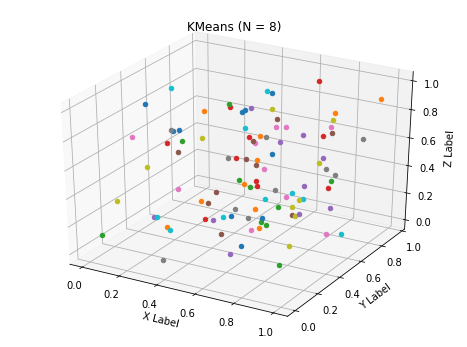

In [315]:
%matplotlib inline
mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr']
j = 0
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111, projection='3d')
plt.title("KMeans (N = 8)");
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
for i in kmeans.labels_:
#     print(i,j)
    ax.scatter(data[j:j+1, 0], data[j:j+1, 1], data[j:j+1, 2], label='parametric curve')
    j += 1

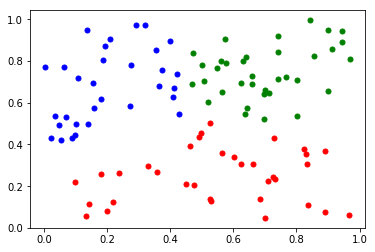

In [286]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
data = np.random.rand(100, 2) 
#生成一个随机数据，样本大小为100, 特征数为2（这里因为要画二维图，所以就将特征设为2，至于三维怎么画？
#后续看有没有机会研究，当然你也可以试着降维到2维画图也行）
estimator = KMeans(n_clusters=3)#构造聚类器，构造一个聚类数为3的聚类器
estimator.fit(data)#聚类
label_pred = estimator.labels_ #获取聚类标签
centroids = estimator.cluster_centers_ #获取聚类中心
inertia = estimator.inertia_ # 获取聚类准则的总和
mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']
#这里'or'代表中的'o'代表画圈，'r'代表颜色为红色，后面的依次类推
color = 0
j = 0 
for i in label_pred:
    plt.plot([data[j:j+1,0]], [data[j:j+1,1]], mark[i], markersize = 5)
    j +=1
plt.show()